In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm
import glob

from utils.utils_stylegan2 import convert_images_to_uint8

In [2]:
def generate_and_save_images(images, it, plot_fig=True):
    plt.close() 
    fig = plt.figure(figsize=(9,9))

    for i in range(images.shape[0]):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i])
        plt.axis('off')

    # tight_layout minimizes the overlap between 2 sub-plots
    fig.tight_layout()
    plt.savefig('images/image_at_iter_{:04d}.png'.format(it))
    if plot_fig: plt.show()

### Machine configuration

In [3]:
impl = 'cuda' # 'ref' if cuda is not available in your machine
gpu = True # False if tensorflow cpu is used

# Load stylegan2 generator

In [4]:
from stylegan2_generator import StyleGan2Generator

#### Loading ffhq stylegan2

Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loaded ffhq generator weights!


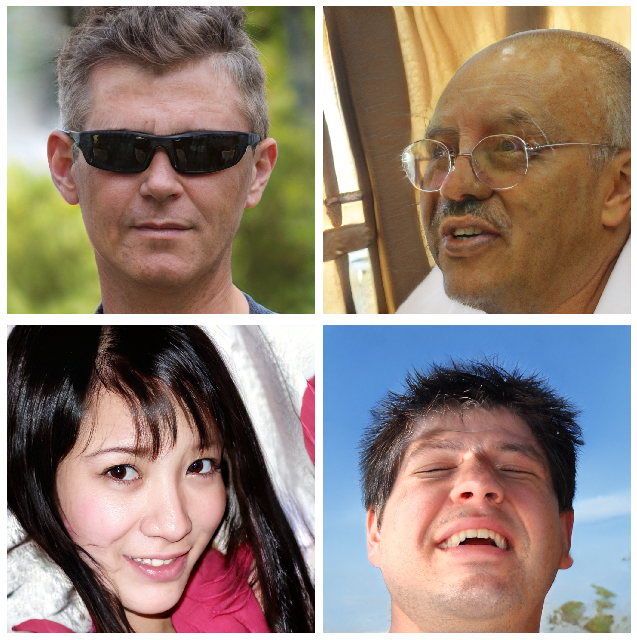

In [5]:
weights_name = 'ffhq' # face model trained by Nvidia

# instantiating generator network
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

# creating random latent vector
seed = 96
rnd = np.random.RandomState(seed)
z = rnd.randn(4, 512).astype('float32')

# running network
out = generator(z)

#converting image to uint8
out_image = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)

generate_and_save_images(out_image.numpy(), 0)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [12:25<00:00,  1.49s/it]


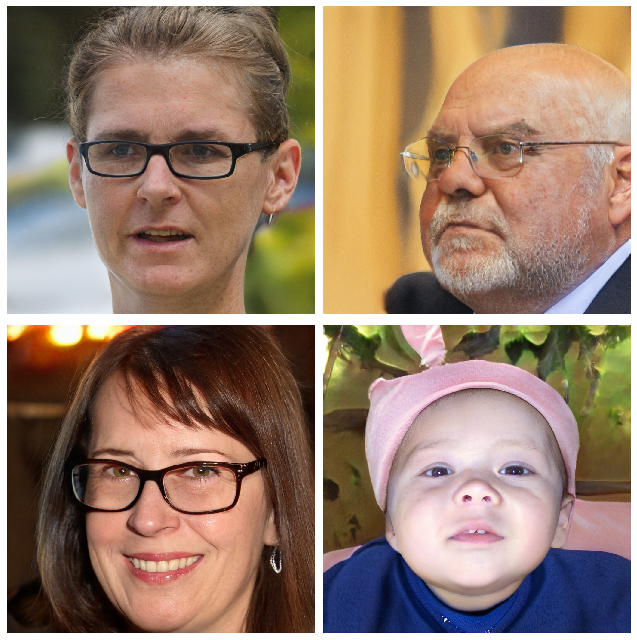

In [6]:
n_images = 500

for i in tqdm(range(n_images)):
    generate_and_save_images(out_image.numpy(), i, plot_fig=False)
    
    #moving randomly in the latent space z
    seed = i
    rnd = np.random.RandomState(seed)
    
    #mofying slightly latent vector and generating new images
    z += rnd.randn(4, 512).astype('float32') / 40
    out = generator(z)
    out_image = convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True)

# Save GIF

In [2]:
anim_file = 'images/ffhq_latent.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('images/image_at_iter*.png')
    filenames = sorted(filenames)
    for i,filename in enumerate(filenames):
        if i % 8 != 0:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)